# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [92]:
import pandas as pd
import numpy as np

StudentDF = pd.read_csv("students-data.csv", delimiter = ';',header =0)

StudentDF.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [93]:
# StudentDF.reset_index(level = 'number', drop = True)


StudentDF.index.name = 'number'
StudentDF.dropna()
StudentDF

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19


# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [103]:
StuNonnumeric = StudentDF.select_dtypes(exclude = ['number'])
StuNumeric = StudentDF.select_dtypes(include = ['number'])


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [104]:
import statistics
Stu_var = StudentDF.var()
StudentDF_new =['traveltime','studytime','failures','famrel','freetime','Dalc'] 
Stu_var.drop(StudentDF_new)


age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [105]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
StuNonnumeric= StuNonnumeric.apply(le.fit_transform)
StuNonnumeric.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [106]:
# StudentDF["G1","G2","G3"]

StuNumeric["new_G1"] = StuNumeric["G1"].map(
        lambda x: 1 if x > 10 else 0)
StuNumeric["new_G2"] = StuNumeric["G2"].map(
        lambda x: 1 if x > 10 else 0)
StuNumeric["new_G3"] = StuNumeric["G3"].map(
        lambda x: 1 if x > 10 else 0)



C:\Users\rloha\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rloha\python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rloha\python\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [107]:
StuNumeric = StuNumeric.drop(columns = ['G1','G2','G3'],axis = 1)


In [137]:
StuNumeric.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,new_G1,new_G2,new_G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,0,0


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [140]:
StudentDF_new = StuNonnumeric.join(StuNumeric)
StudentDF_new

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,new_G1,new_G2,new_G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,4,3,4,1,1,3,6,0,0,0
1,0,0,1,0,1,0,2,0,0,0,...,5,3,3,1,1,3,4,0,0,0
2,0,0,1,1,1,0,2,2,1,1,...,4,3,2,2,3,3,10,0,0,0
3,0,0,1,0,1,1,3,1,1,0,...,3,2,2,1,1,5,2,1,1,1
4,0,0,1,0,1,2,2,1,0,0,...,4,3,2,1,2,5,4,0,0,0
5,0,1,1,1,1,3,2,3,1,0,...,5,4,2,1,2,5,10,1,1,1
6,0,1,1,1,1,2,2,1,1,0,...,4,4,4,1,1,3,0,1,1,1
7,0,0,1,0,0,2,4,1,1,1,...,4,1,4,1,1,1,6,0,0,0
8,0,1,1,1,0,3,2,1,1,0,...,4,2,2,1,1,1,0,1,1,1


In [141]:
X = StudentDF_new.loc[:, StudentDF_new.columns != 'new_G3']
Y = StudentDF_new['new_G3']


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [142]:

from sklearn.model_selection import train_test_split
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=95, random_state=0)
print(X_train)
print(X_test)

        school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
number                                                                         
63           0    0        1        0        1     4     1       1         1   
245          0    1        1        0        1     2     2       0         1   
154          0    0        1        0        1     2     4       0         1   
311          0    0        1        0        1     0     2       2         2   
81           0    1        1        0        1     2     2       1         1   
344          0    0        1        0        1     0     2       0         1   
336          0    0        0        0        0     3     0       1         2   
124          0    0        1        0        1     2     2       1         1   
250          0    1        1        0        1     3     2       0         1   
89           0    1        1        1        0     4     1       3         1   
181          0    1        1        0   

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [154]:

lr = LogisticRegression(fit_intercept = True)

mdl = lr.fit(X_train,y_train )

print("\nScore of model is:", mdl.score(X_train,y_train))




Score of model is: 0.94


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [155]:
mdl.intercept_

array([0.29451632])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [177]:


result = pd.DataFrame(mdl.coef_ ,columns = X_train.columns).T

In [178]:
result

,0
school,-1.006183
sex,-0.043351
address,0.226230
famsize,-0.097354
Pstatus,-0.557788
Mjob,-0.035061
Fjob,-0.072656
reason,-0.234832
guardian,-0.227638
schoolsup,0.530018


In [179]:
#new_G2 has the highest impact on model

# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [180]:
mdl.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [181]:
mdl.score(X_train,y_train)

0.94

In [182]:
mdl.predict(X_train)

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1], d

In [183]:
mdl.score(X_test,y_test)

0.8947368421052632

# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [319]:
bc2 = pd.read_csv("bc2.csv", header = 0)
bc2

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [320]:
print(bc2.shape)
print(bc2.dtypes)

(699, 11)
ID                           int64
ClumpThickness               int64
CellSize                     int64
CellShape                    int64
MarginalAdhesion             int64
SingleEpithelialCellSize     int64
BareNuclei                  object
NormalNucleoli               int64
BlandChromatin               int64
Mitoses                      int64
Class                        int64
dtype: object


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [292]:
bc2.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
CellShape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
MarginalAdhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
SingleEpithelialCellSize,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
BareNuclei,699.0,3.486409e+00,3.621929,1.0,1.0,1.0,5.0,10.0
NormalNucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
BlandChromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [317]:
#Here, we are seeing some extreme values but these are not outliers so no need to do any outlier treatment

In [255]:
bc2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                          699 non-null int64
ClumpThickness              699 non-null int64
CellSize                    699 non-null int64
CellShape                   699 non-null int64
MarginalAdhesion            699 non-null int64
SingleEpithelialCellSize    699 non-null int64
BareNuclei                  699 non-null object
NormalNucleoli              699 non-null int64
BlandChromatin              699 non-null int64
Mitoses                     699 non-null int64
Class                       699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Check Missing Values

In [256]:
bc2.isna()
print(bc2.isna().sum())


ID                          0
ClumpThickness              0
CellSize                    0
CellShape                   0
MarginalAdhesion            0
SingleEpithelialCellSize    0
BareNuclei                  0
NormalNucleoli              0
BlandChromatin              0
Mitoses                     0
Class                       0
dtype: int64


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [257]:
bc2[bc2['BareNuclei'] == '?'].count()
bc2['BareNuclei'].describe()
bc2['BareNuclei'].replace('?',1, inplace = True)

### Print and plot the distribution of target variable (Class - using Histogram) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178F6439CC0>]],
      dtype=object)

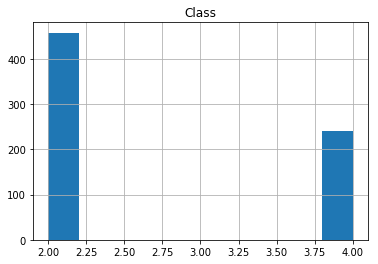

In [282]:
bc2.hist(column = "Class")

### convert the datatype of Bare Nuclei to `int`

In [265]:
bc2['BareNuclei'] = bc2['BareNuclei'].fillna(0)

In [270]:
bc2['BareNuclei'] = bc2['BareNuclei'].astype('int64')


In [271]:
bc2.dtypes

ID                          int64
ClumpThickness              int64
CellSize                    int64
CellShape                   int64
MarginalAdhesion            int64
SingleEpithelialCellSize    int64
BareNuclei                  int64
NormalNucleoli              int64
BlandChromatin              int64
Mitoses                     int64
Class                       int64
dtype: object

### Standardization of Data (Use Standard Scaler)

In [272]:
#Dividing test and training
x = bc2.loc[:, bc2.columns != 'Class']
y = bc2['Class'] 

In [273]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(x)
print(train_scaled)
print(scaler.mean_)


[[-0.11623873  0.20693572 -0.69999505 ... -0.17966213 -0.61182504
  -0.34391178]
 [-0.1115035   0.20693572  0.28384518 ... -0.17966213 -0.28411186
  -0.34391178]
 [-0.09126525 -0.50386559 -0.69999505 ... -0.17966213 -0.61182504
  -0.34391178]
 ...
 [-0.29657482  0.20693572  2.25152563 ...  1.87236122  2.33759359
   0.23956962]
 [-0.28254589 -0.14846494  1.59563215 ...  2.69317056  1.02674087
  -0.34391178]
 [-0.28254589 -0.14846494  1.59563215 ...  2.69317056  0.37131451
  -0.34391178]]
[1.07170410e+06 4.41773963e+00 3.13447783e+00 3.20743920e+00
 2.80686695e+00 3.21602289e+00 3.48640916e+00 3.43776824e+00
 2.86695279e+00 1.58941345e+00]


In [274]:
x= pd.DataFrame(train_scaled, columns = x.columns)
x

,ID,ClumpThickness,CellSize,CellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,NormalNucleoli,BlandChromatin,Mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,1.799664,2.282766,1.354454,-0.343912
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,1.799664,-0.179662,-0.611825,-0.343912
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-1.000471,-0.611825,1.990014
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.686979,-0.590067,-0.611825,-0.343912


### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

C:\Users\rloha\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000178F5F302B0>,
      dtype=object)

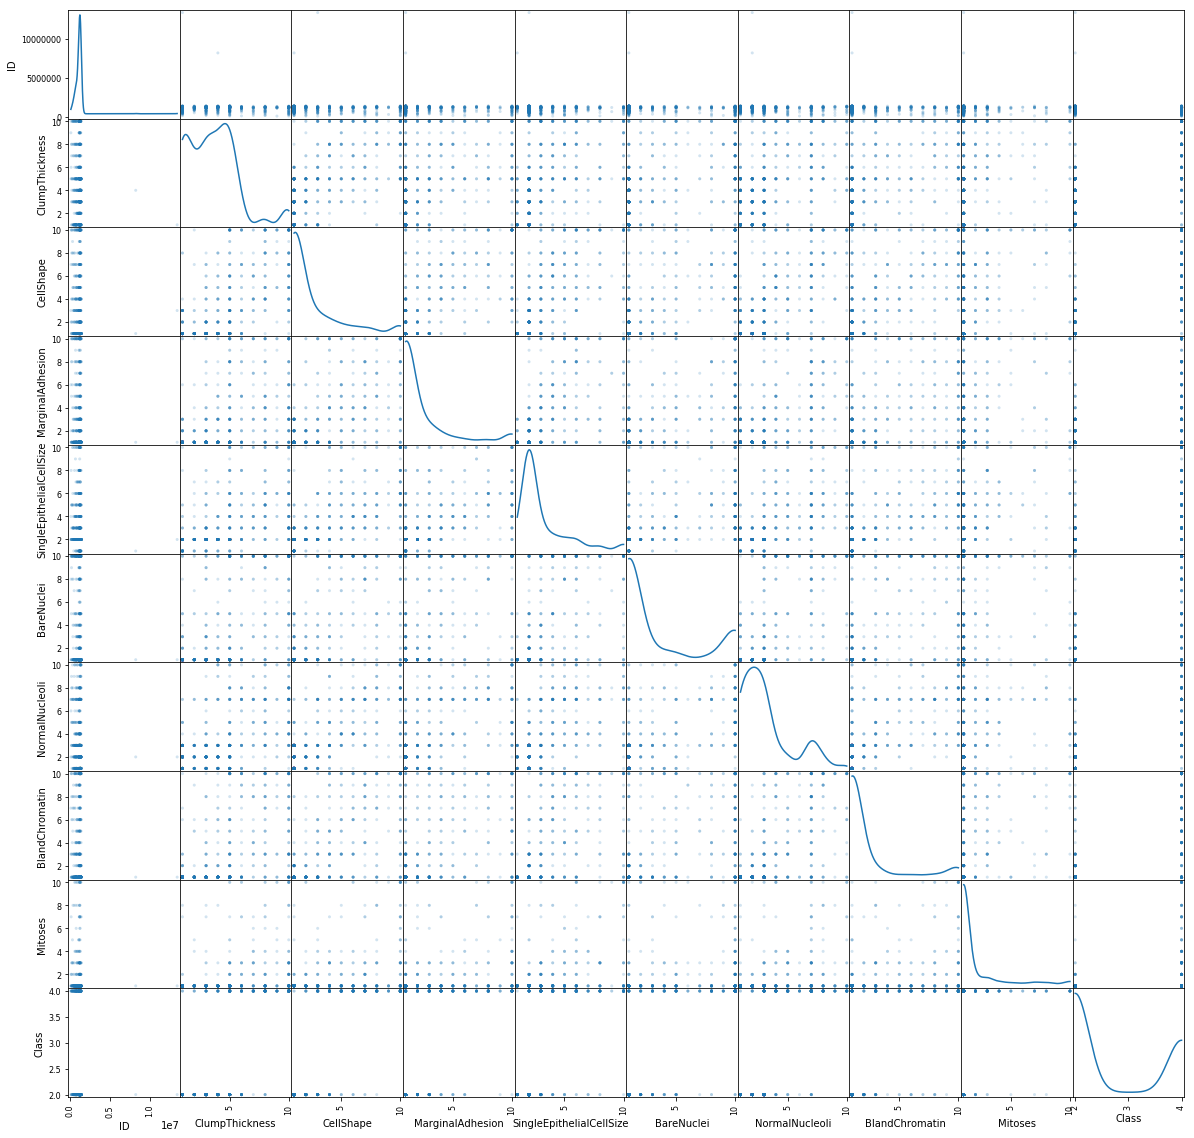

In [316]:
pd.scatter_matrix(bc2, figsize=(20, 20), alpha=0.2, diagonal = 'kde')

In [275]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Class ~  ClumpThickness + CellSize 
        + CellShape + MarginalAdhesion + SingleEpithelialCellSize + BareNuclei + NormalNucleoli + BlandChromatin
 + Mitoses""",bc2)
vif

,Variable,VIF
0,Intercept,5.1
1,ClumpThickness,1.9
2,CellSize,7.2
3,CellShape,6.5
4,MarginalAdhesion,2.5
5,SingleEpithelialCellSize,2.5
6,BareNuclei,2.5
7,NormalNucleoli,2.9
8,BlandChromatin,2.4
9,Mitoses,1.4


In [276]:
bc2 = bc2.drop("CellSize", axis =1)

In [277]:
#VIF Factor
def VIF(formula,data):
    from patsy import dmatrices
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
        for i in range(X.shape[1])]
    return(vif.round(1))

vif=VIF("""Class ~  ClumpThickness  
        + CellShape + MarginalAdhesion + SingleEpithelialCellSize + BareNuclei + NormalNucleoli + BlandChromatin
 + Mitoses""",bc2)
vif

,Variable,VIF
0,Intercept,4.8
1,ClumpThickness,1.9
2,CellShape,4.0
3,MarginalAdhesion,2.4
4,SingleEpithelialCellSize,2.4
5,BareNuclei,2.5
6,NormalNucleoli,2.8
7,BlandChromatin,2.4
8,Mitoses,1.4


In [315]:
# By removing CellSize we can see that CellShape VIF came down so we can say that these are collinear variables

### Divide the dataset into feature set and target set

In [278]:
print(x,y)

           ID  ClumpThickness  CellSize  CellShape  MarginalAdhesion  \
0   -0.116239        0.206936 -0.699995  -0.743299         -0.633247   
1   -0.111504        0.206936  0.283845   0.266875          0.768621   
2   -0.091265       -0.503866 -0.699995  -0.743299         -0.633247   
3   -0.089884        0.562336  1.595632   1.613773         -0.633247   
4   -0.088674       -0.148465 -0.699995  -0.743299          0.067687   
5   -0.088513        1.273138  2.251526   2.287222          1.820022   
6   -0.086929       -1.214667 -0.699995  -0.743299         -0.633247   
7   -0.086180       -0.859266 -0.699995  -0.406574         -0.633247   
8   -0.062638       -0.859266 -0.699995  -0.743299         -0.633247   
9   -0.062638       -0.148465 -0.372048  -0.743299         -0.633247   
10  -0.059062       -1.214667 -0.699995  -0.743299         -0.633247   
11  -0.057621       -0.859266 -0.699995  -0.743299         -0.633247   
12  -0.048492        0.206936 -0.044102  -0.069850          0.06

### Divide the Training and Test sets in 70:30 

In [297]:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Model 1 : Implement a default Decision Tree model with no attributes

In [308]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [309]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                 Imp
school      0.000000
sex         0.010106
address     0.000000
famsize     0.000000
Pstatus     0.000000
Mjob        0.022648
Fjob        0.010106
reason      0.008402
guardian    0.000000
schoolsup   0.011894
famsup      0.000000
paid        0.000000
activities  0.000000
nursery     0.000000
higher      0.000000
internet    0.000000
romantic    0.000000
age         0.055212
Medu        0.000000
Fedu        0.053185
traveltime  0.033510
studytime   0.000000
failures    0.000000
famrel      0.046459
freetime    0.012509
goout       0.014433
Dalc        0.000000
Walc        0.009517
health      0.010106
absences    0.045429
new_G1      0.023219
new_G2      0.633266


### Check the training & test accuracy of model 1 

In [310]:
y_predict = dt_model.predict(x_test)

In [311]:
print(dt_model.score(x_train , Y_train))
print(dt_model.score(x_test , Y_test))

1.0
0.8571428571428571


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [312]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, max_leaf_nodes = 5)
reg_dt_model.fit(x_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [313]:
print(reg_dt_model.score(x_train , Y_train))
print(reg_dt_model.score(x_test , Y_test))

0.9456521739130435
0.9243697478991597


### Print the confusion matrix of model 1 and model 2

In [314]:
print(metrics.confusion_matrix(Y_test, y_predict))

[[54 12]
 [ 5 48]]
